# Classification Models on Recipes

This notebook contains simpler classification models rather than an LLM. The main goal here is to predict the calorie count given a recipe. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import Counter

In [2]:
raw_df = pd.read_csv('recipes.csv')
raw_df.head()

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,calories,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,245.950111,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,331.965452,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'..."
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,1025.432452,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,220.173635,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe..."
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,245.191312,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uri              13272 non-null  object 
 1   label            13272 non-null  object 
 2   image            13272 non-null  object 
 3   source           13272 non-null  object 
 4   url              13272 non-null  object 
 5   shareAs          13272 non-null  object 
 6   yield            13272 non-null  float64
 7   dietLabels       13272 non-null  object 
 8   healthLabels     13272 non-null  object 
 9   cautions         13272 non-null  object 
 10  ingredientLines  13272 non-null  object 
 11  ingredients      13272 non-null  object 
 12  calories         13272 non-null  float64
 13  totalWeight      13272 non-null  float64
 14  totalTime        13272 non-null  float64
 15  cuisineType      13272 non-null  object 
 16  mealType         13272 non-null  object 
 17  dishType    

In [4]:
raw_df.describe()

,yield,calories,totalWeight,totalTime
count,13272.000000,13272.000000,13272.000000,13272.000000
mean,6.390032,1919.546543,1247.258306,59.567021
std,6.267674,1938.485052,1009.295434,400.767255
min,0.666000,0.840000,5.325627,0.000000
25%,4.000000,734.920750,575.989799,0.000000
50%,4.000000,1419.177262,980.685969,15.000000
75%,8.000000,2429.584040,1590.382305,45.000000
max,150.000000,44565.178197,7956.830802,30245.000000


In [5]:
raw_df[raw_df['calories'] < 5000]

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,calories,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,245.950111,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,331.965452,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'..."
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,1025.432452,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,220.173635,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe..."
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,245.191312,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,http://www.edamam.com/ontologies/edamam.owl#re...,Red Pepper Farro With Tuna,https://edamam-product-images.s3.amazonaws.com...,Self,https://www.self.com/recipe/red-pepper-farro-w...,http://www.edamam.com/recipe/red-pepper-farro-...,6.0,[],"['Sugar-Conscious', 'Pescatarian', 'Mediterran...",['Sulfites'],...,1118.129068,652.479234,0.0,['italian'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN
13268,http://www.edamam.com/ontologies/edamam.owl#re...,Tuna Salad,https://edamam-product-images.s3.amazonaws.com...,Food Network,https://www.foodnetwork.com/recipes/food-netwo...,http://www.edamam.com/recipe/tuna-salad-9a9f92...,4.0,['Low-Carb'],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",['Sulfites'],...,848.826200,4

So most recipes have less than 5000 calories. Certainly past 10000 calories for a single meal is abnormal so we might consider removing these recipes from consideration. Likely though, most meals will have less than 2500 calories, so removing recipes with calories counts past aroudn 2500 makes the most sense.

In [6]:
raw_df.iloc[5]

uri                http://www.edamam.com/ontologies/edamam.owl#re...
label                                             French Green Beans
image              https://edamam-product-images.s3.amazonaws.com...
source                                                  Food Network
url                https://www.foodnetwork.com/recipes/danny-boom...
shareAs            http://www.edamam.com/recipe/french-green-bean...
yield                                                            6.0
dietLabels                                               ['Low-Fat']
healthLabels       ['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...
cautions                                                          []
ingredientLines    ['1 pound French green beans (haricots verts)'...
ingredients        [{'text': '1 pound French green beans (haricot...
calories                                                  140.613635
totalWeight                                               456.240835
totalTime                         

## Data Exploration and Preprocessing.

To start, we want to build a classification model on the calories column. So we will convert the column to bins to make it a classification task. Then the input will be the recipe name and we will also use the mealType and dishType since these are things people should know off hand normally. healthLabels and dietLabels won't always be easily known so it might be better to predicts these themselves rather than using them as inputs. 

In [7]:
#first drop duplicates from recipe names or label column
df = raw_df.drop_duplicates('label')
df.shape

(11680, 22)

In [8]:
df['dishType'].isna().sum()

114

In [9]:
df['mealType'].isna().sum()

0

In [10]:
# so we need to remove the rows with null dishType
df = df.dropna(subset=['dishType'])
print(df['dishType'].isna().sum())

0


In [11]:
df.shape

(11566, 22)

### Calories - Target Variable

In [12]:
#function for quick view of distribution
def plot_distribution(data, bins=10, title='Distribution', ylabel='Count'):
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black') #max calories value is 45000 so 45 bins
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

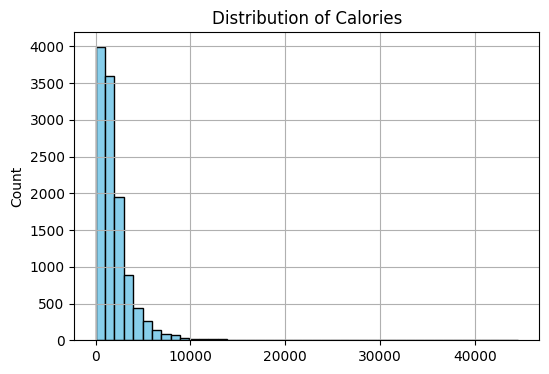

In [13]:
# Assuming dfplot_distribution is your DataFrame and 'column_name' is the name of the column containing the float data
calories_df = df['calories']

plot_distribution(calories_df, bins=45, title='Distribution of Calories')

In [14]:
calories_df.quantile(0.90)

3929.6416603584908

Let's make this more reasonable to start with. Make the dataset only consider recipes with less than 4000 calories or less since that contains 90% of our data and is more normal. Also, counting calories is always error prone so going for ranges of 300 makes sense. 

In [15]:
#defining functions to round the quartile to the nearest multiple of 300
#rounding up and down to nearest multiple of 300, or whatever bin_size, then we can select whichever is closer
def round_up_to_nearest(number, bin_size=300):
    # Round up to the nearest multiple of 100
    rounded_number = ((number + 99) // 100) * 100
    # Find the nearest multiple of 300 that is greater than or equal to the rounded number
    rounded_number = ((rounded_number + (bin_size-1)) // bin_size) * bin_size
    return rounded_number

def round_down_to_nearest(number, bin_size=300):
    # Round down to the nearest multiple of 100
    rounded_number = (number // 100) * 100
    # Find the nearest multiple of 300 that is less than or equal to the rounded number
    rounded_number = (rounded_number // bin_size) * bin_size
    return rounded_number

def filter_calories(df, column='calories', quartile_percent=0.9):
    #get the calories cutoff and round up or down, whichever is closer
    calorie_cutoff = df[column].quantile(quartile_percent)
    rounded_down = round_down_to_nearest(calorie_cutoff)
    rounded_up = round_up_to_nearest(calorie_cutoff)

    diff_to_rounded_down = abs(calorie_cutoff - rounded_down)
    diff_to_rounded_up = abs(calorie_cutoff - rounded_up)
    
    # Select the min or max value, whichever is closer to the number
    if diff_to_rounded_down < diff_to_rounded_up:
        return df[df[column] < rounded_down]['calories']
    else:
        return df[df[column] < rounded_up]['calories']

In [16]:
filtered_calories_df = filter_calories(df)
print(filtered_calories_df.shape)
print(max(filtered_calories_df))

(10385,)
3899.60432375


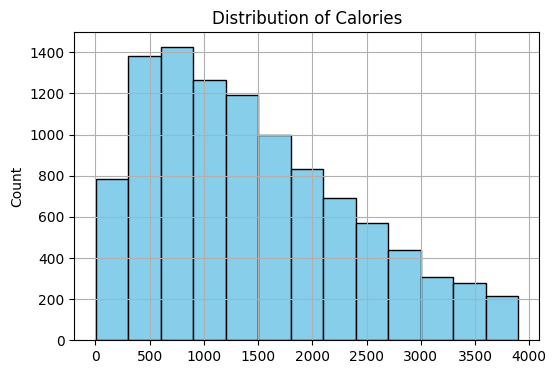

In [17]:
# Plotting histogram with no extreme values
plot_distribution(filtered_calories_df, bins=13, title='Distribution of Calories')

The distribution looks skewed to the left, which makes sense. Let's bin the calorie counts now.

In [18]:
max_calorie_cutoff = round_up_to_nearest(max(filtered_calories_df))
print('Calories Cutoff:', max_calorie_cutoff)

Calories Cutoff: 3900.0


In [19]:
#putting calories into ranges
bin_edges = [i for i in range(0, int(max_calorie_cutoff)+1, 300)]
labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]
binned_calories = pd.cut(filtered_calories_df, bins=bin_edges, labels=labels, include_lowest=True)
binned_calories

0            0-299
1          300-599
2         900-1199
3            0-299
4            0-299
           ...    
13265    2400-2699
13266      300-599
13269    1500-1799
13270      300-599
13271      600-899
Name: calories, Length: 10385, dtype: category
Categories (13, object): ['0-299' < '300-599' < '600-899' < '900-1199' ... '2700-2999' < '3000-3299' < '3300-3599' < '3600-3899']

In [20]:
binned_calories.isna().sum()

0

In [21]:
Counter(binned_calories)

Counter({'600-899': 1425,
         '300-599': 1381,
         '900-1199': 1269,
         '1200-1499': 1190,
         '1500-1799': 1002,
         '1800-2099': 834,
         '0-299': 780,
         '2100-2399': 692,
         '2400-2699': 568,
         '2700-2999': 440,
         '3000-3299': 309,
         '3300-3599': 278,
         '3600-3899': 217})

In [22]:
binned_calories = pd.DataFrame(binned_calories).rename(columns={'calories':'binnedCalories'})

In [23]:
#get the full dataframe with these indices
binned_calories_df = df.loc[binned_calories.index]
binned_calories_df = pd.concat([binned_calories_df, binned_calories], axis = 1)
binned_calories_df.head()

,uri,label,image,source,url,shareAs,yield,dietLabels,healthLabels,cautions,...,totalWeight,totalTime,cuisineType,mealType,dishType,totalNutrients,totalDaily,digest,tags,binnedCalories
0,http://www.edamam.com/ontologies/edamam.owl#re...,Green Beans,https://edamam-product-images.s3.amazonaws.com...,Martha Stewart,http://www.marthastewart.com/338543/green-beans,http://www.edamam.com/recipe/green-beans-a91ad...,4.0,[],"['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,471.932982,24.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,0-299
1,http://www.edamam.com/ontologies/edamam.owl#re...,Sauteed Green Beans,https://edamam-product-images.s3.amazonaws.com...,Epicurious,https://www.epicurious.com/recipes/food/views/...,http://www.edamam.com/recipe/sauteed-green-bea...,8.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,699.388555,0.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Vegetarian', 'Vegan', 'Quick & Easy', 'Bean'...",300-599
2,http://www.edamam.com/ontologies/edamam.owl#re...,Caramelized Green Beans,https://edamam-product-images.s3.amazonaws.com...,Saveur,http://www.saveur.com/article/Recipes/Carameli...,http://www.edamam.com/recipe/caramelized-green...,6.0,"['Low-Carb', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,793.988555,0.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,900-1199
3,http://www.edamam.com/ontologies/edamam.owl#re...,Sautéed Fresh Green Beans,https://edamam-product-images.s3.amazonaws.com...,EatingWell,http://www.eatingwell.com/recipe/261341/sautee...,http://www.edamam.com/recipe/saut%C3%A9ed-fres...,4.0,"['Balanced', 'Low-Sodium']","['Sugar-Conscious', 'Kidney-Friendly', 'Keto-F...",[],...,462.592370,5.0,['french'],['lunch/dinner'],['starter'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...","['Gluten-Free', 'Low Fat', 'Vegan', 'High Fibe...",0-299
4,http://www.edamam.com/ontologies/edamam.owl#re...,Fancy Green Beans,https://edamam-product-images.s3.amazonaws.com...,PBS Food,http://www.pbs.org/food/recipes/fancy-green-be...,http://www.edamam.com/recipe/fancy-green-beans...,2.0,"['Balanced', 'High-Fiber']","['Vegan', 'Vegetarian', 'Pescatarian', 'Dairy-...","['Sulfites', 'FODMAP']",...,472.898439,47.0,['american'],['lunch/dinner'],['main course'],"{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","{'ENERC_KCAL': {'label': 'Energy', 'quantity':...","[{'label': 'Fat', 'tag': 'FAT', 'schemaOrgTag'...",NaN,0-299


In [24]:
binned_calories_df.reset_index(inplace=True)
binned_calories_df.shape

(10385, 24)

In [25]:
binned_calories_df.columns

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'binnedCalories'],
      dtype='object')

Later we will probably do label encoding.

### Input Variables

#### Label

In [26]:
binned_calories_df['label']

0                      Green Beans
1              Sauteed Green Beans
2          Caramelized Green Beans
3        Sautéed Fresh Green Beans
4                Fancy Green Beans
                   ...            
10380    Tuna melt pizza baguettes
10381             Quick Tuna Salad
10382         Savory Tuna Sandwich
10383      Tiny Tuna Melts recipes
10384         Mexi-Cali Tuna Salad
Name: label, Length: 10385, dtype: object

Nothing to do here now. Will have to use NLP to preprocess.

#### dishType

In [27]:
dishType_df = binned_calories_df['dishType'].apply(ast.literal_eval)

In [28]:
#we have a few columns with list elements and we want to see the unqiue values so this function can do that
def get_values(df, column):
    df.loc[df[column].isna(), column] = '[]'
    labels_lst = []
    for label in df[column].apply(ast.literal_eval):
        labels_lst += label
    return labels_lst

#this checks to see what recipes are multilabeled for the given column
def check_if_multilabel(df, column):
    lst = []
    for row in df[column].apply(ast.literal_eval):
        if len(row) > 1:
            lst.append(row)
    return lst

In [29]:
Counter(get_values(binned_calories_df, 'dishType'))

Counter({'main course': 3381,
         'starter': 1757,
         'condiments and sauces': 1217,
         'desserts': 1080,
         'salad': 1023,
         'sandwiches': 416,
         'soup': 411,
         'drinks': 377,
         'bread': 251,
         'cereals': 206,
         'alcohol cocktail': 168,
         'biscuits and cookies': 116,
         'pancake': 81,
         'egg': 40,
         'preserve': 11,
         'special occasions': 11,
         'omelet': 7,
         'christmas': 7,
         'preps': 6,
         'thanksgiving': 2,
         'new year': 1,
         'cinco de mayo': 1})

In [30]:
print('Number of unique dish types:', len(set(get_values(binned_calories_df, 'dishType'))))

Number of unique dish types: 22


In [31]:
len(check_if_multilabel(binned_calories_df, 'dishType'))

166

In [32]:
priority_list_dish_type = [
    'main course',
    'starter',
    'salad',
    'soup',
    'drinks',
    'bread',
    'desserts',
    'condiments and sauces',
    'sandwiches',
    'cereals',
    'alcohol cocktail',
    'biscuits and cookies',
    'pancake',
    'egg',
    'preserve',
    'omelet',
    'special occasions',
    'christmas',
    'preps',
    'thanksgiving',
    'cinco de mayo'
]

In [33]:
new_dish_type_df = []
for dish_type_lst in dishType_df:
    if len(dish_type_lst) == 1:
        new_dish_type_df.append(dish_type_lst[0])
    else:
        for dish_type in priority_list_dish_type:
            if dish_type in dish_type_lst:
                new_dish_type_df.append(dish_type)
                break

In [34]:
Counter(new_dish_type_df)

Counter({'main course': 3381,
         'starter': 1744,
         'condiments and sauces': 1207,
         'desserts': 1068,
         'salad': 970,
         'sandwiches': 407,
         'soup': 394,
         'drinks': 377,
         'bread': 250,
         'cereals': 204,
         'alcohol cocktail': 168,
         'biscuits and cookies': 116,
         'pancake': 81,
         'preserve': 11,
         'preps': 5,
         'special occasions': 2})

In [35]:
new_dish_type_df = pd.DataFrame(new_dish_type_df)
new_dish_type_df.rename(columns={0: 'dishTypeLabel'}, inplace=True)
new_dish_type_df.head()

,dishTypeLabel
0,main course
1,starter
2,main course
3,starter
4,main course


In [36]:
#make a new df for all columns
df2 = pd.concat([binned_calories_df, new_dish_type_df], axis=1)
df2.columns

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'binnedCalories', 'dishTypeLabel'],
      dtype='object')

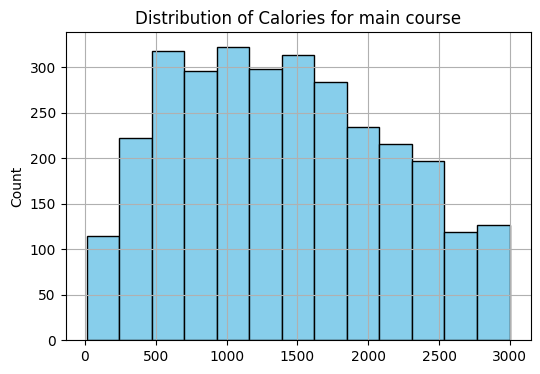

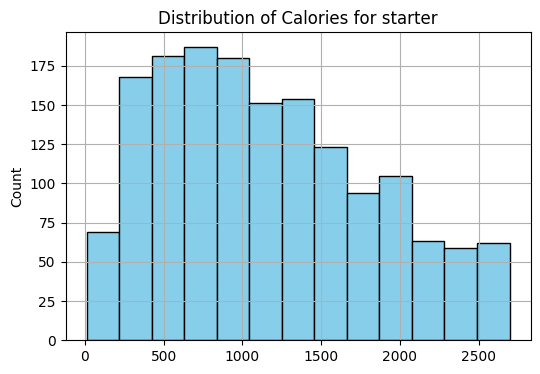

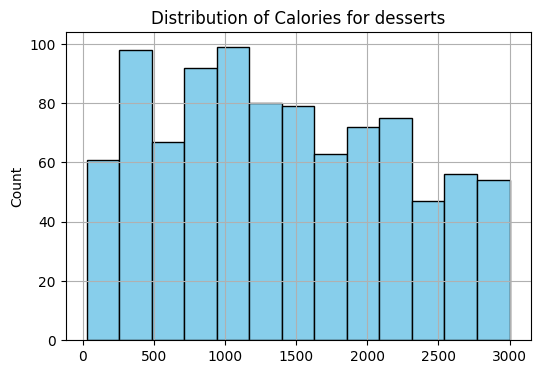

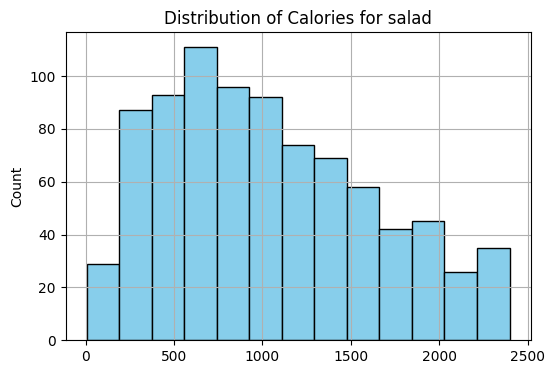

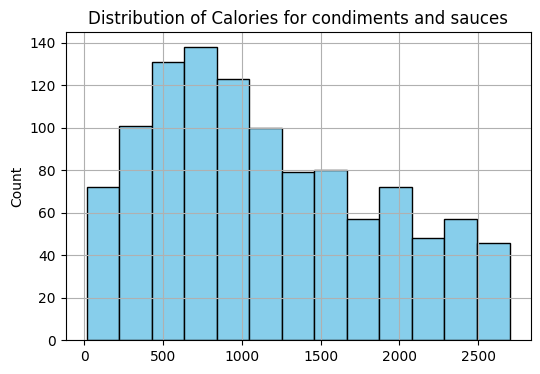

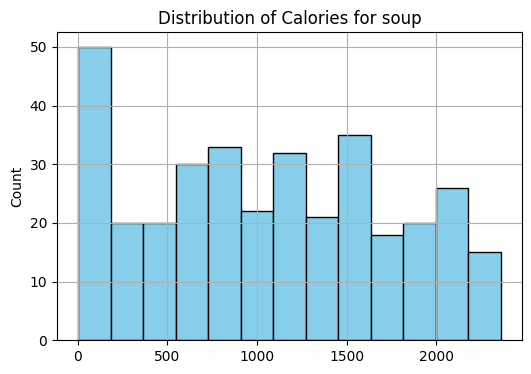

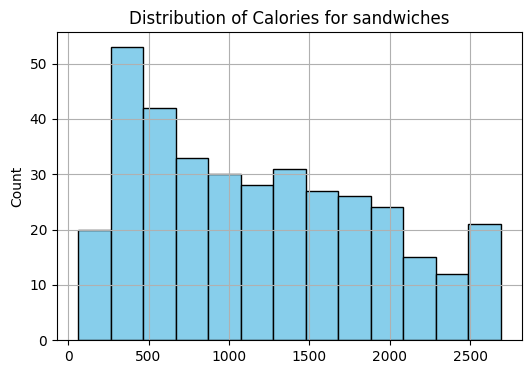

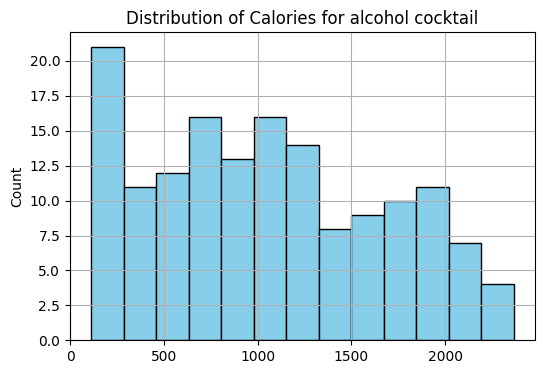

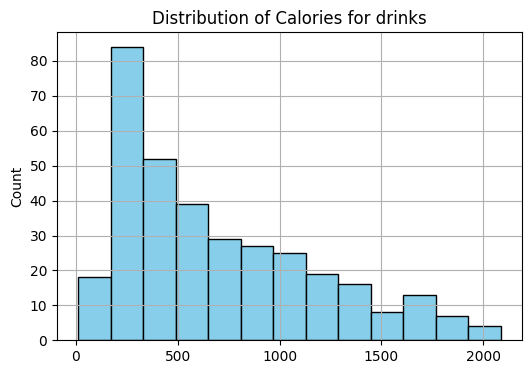

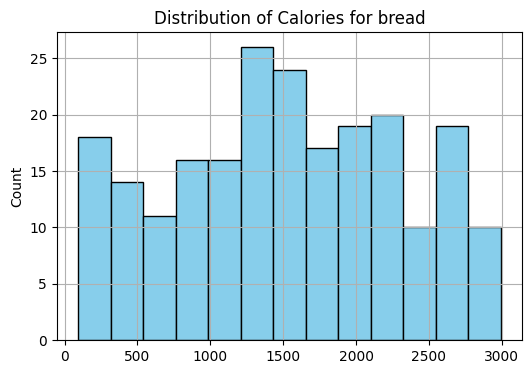

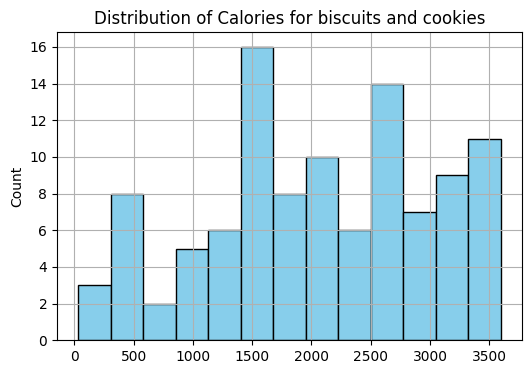

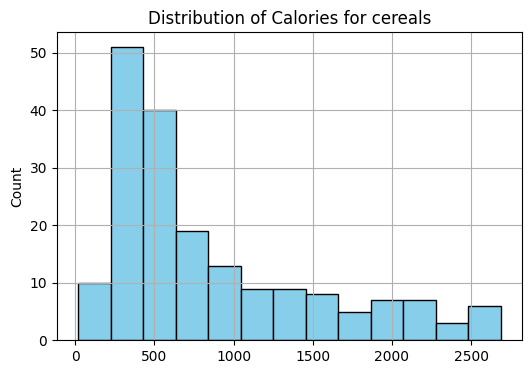

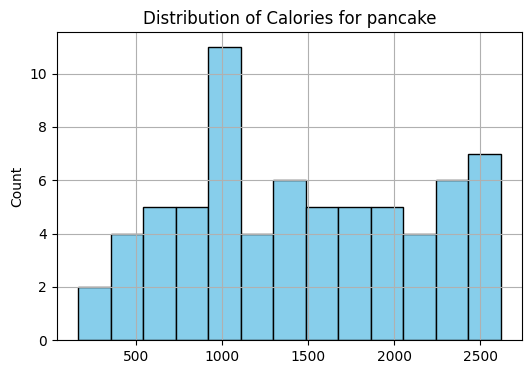

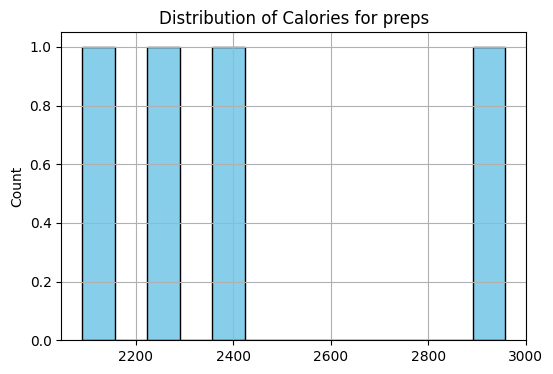

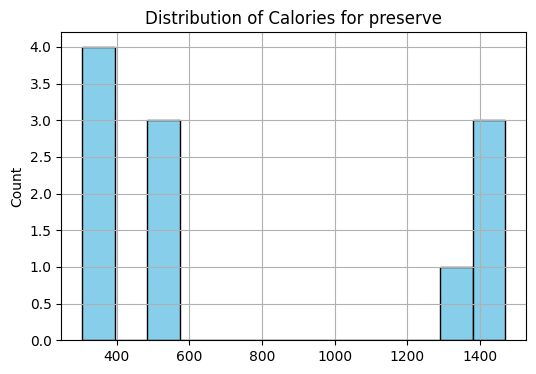

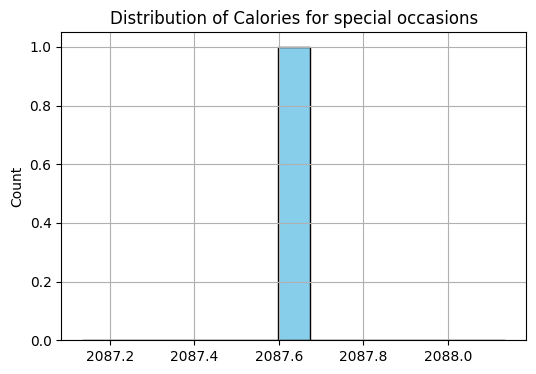

In [114]:
unique_dish_types = list(df2['dishTypeLabel'].unique())
for dishTypeLabel in unique_dish_types:
    dishTypeLabel_calories_df = df2[df2['dishTypeLabel'] == dishTypeLabel]
    dishTypeLabel_calories_df = filter_calories(dishTypeLabel_calories_df)
    plot_distribution(dishTypeLabel_calories_df, bins=13, title='Distribution of Calories for {}'.format(dishTypeLabel))

So we can see all these distributions but to automate this process let's calculate a measure of the skewedness and put these categories into 3 snew categories based on the skewedness.

In [37]:
skewness_by_category = df2.groupby('dishTypeLabel')['calories'].skew()
skewness_by_category

dishTypeLabel
alcohol cocktail         0.884605
biscuits and cookies    -0.204065
bread                    0.189855
cereals                  1.315521
condiments and sauces    0.739704
desserts                 0.386819
drinks                   1.554733
main course              0.515460
pancake                  0.277986
preps                    0.593710
preserve                 0.583254
salad                    0.926322
sandwiches               0.637394
soup                     0.585448
special occasions             NaN
starter                  0.776458
Name: calories, dtype: float64

To make categories let's bin them into 3 categories. We can keep it simple for now and take the max-min and divide it by 3.

In [38]:
skewness_min = skewness_by_category.min()
skewness_max = skewness_by_category.max()

interval_width = (skewness_max - skewness_min) / 3
bin1_end = skewness_min + interval_width
bin2_end = bin1_end + interval_width

bins = {
    'Left Skewed (Higher Calories)': skewness_by_category[(skewness_by_category >= skewness_min) & (skewness_by_category < bin1_end)],
    'Approximately Symmetric (Normal Calories)': skewness_by_category[(skewness_by_category >= bin1_end) & (skewness_by_category < bin2_end)],
    'Right Skewed (Lower Calories)': skewness_by_category[skewness_by_category >= bin2_end]
}

for bin_name, categories in bins.items():
    print(f"{bin_name}: {', '.join(categories.index)}")

Left Skewed (Higher Calories): biscuits and cookies, bread, pancake
Approximately Symmetric (Normal Calories): alcohol cocktail, condiments and sauces, desserts, main course, preps, preserve, salad, sandwiches, soup, starter
Right Skewed (Lower Calories): cereals, drinks


In [39]:
bins['Left Skewed (Higher Calories)'].index

Index(['biscuits and cookies', 'bread', 'pancake'], dtype='object', name='dishTypeLabel')

In [40]:
#get these categories and make them keys with values as the type of skew, then this will be a map to transform our column
skew_map = {}
for skew in bins.keys():
    for category in bins[skew].index:
        skew_map[category] = skew
        #print(category)

skew_map

{'biscuits and cookies': 'Left Skewed (Higher Calories)',
 'bread': 'Left Skewed (Higher Calories)',
 'pancake': 'Left Skewed (Higher Calories)',
 'alcohol cocktail': 'Approximately Symmetric (Normal Calories)',
 'condiments and sauces': 'Approximately Symmetric (Normal Calories)',
 'desserts': 'Approximately Symmetric (Normal Calories)',
 'main course': 'Approximately Symmetric (Normal Calories)',
 'preps': 'Approximately Symmetric (Normal Calories)',
 'preserve': 'Approximately Symmetric (Normal Calories)',
 'salad': 'Approximately Symmetric (Normal Calories)',
 'sandwiches': 'Approximately Symmetric (Normal Calories)',
 'soup': 'Approximately Symmetric (Normal Calories)',
 'starter': 'Approximately Symmetric (Normal Calories)',
 'cereals': 'Right Skewed (Lower Calories)',
 'drinks': 'Right Skewed (Lower Calories)'}

In [41]:
df2['dishTypeSkewedLabels'] = df2['dishTypeLabel'].map(skew_map)

In [42]:
df2.keys()

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'binnedCalories', 'dishTypeLabel', 'dishTypeSkewedLabels'],
      dtype='object')

In [43]:
df2['dishTypeSkewedLabels'].unique()

array(['Approximately Symmetric (Normal Calories)',
       'Right Skewed (Lower Calories)', 'Left Skewed (Higher Calories)',
       nan], dtype=object)

In [44]:
for item in df2['dishTypeSkewedLabels']:
    if item not in ['Approximately Symmetric (Normal Calories)', 'Right Skewed (Lower Calories)', 'Left Skewed (Higher Calories)']:
        print(item)

nan
nan


#### mealType

In [45]:
set(get_values(df2, 'mealType'))

{'breakfast', 'brunch', 'lunch/dinner', 'snack', 'teatime'}

In [46]:
Counter(get_values(df2, 'mealType'))

Counter({'lunch/dinner': 8909,
         'breakfast': 817,
         'snack': 414,
         'brunch': 145,
         'teatime': 139})

In [47]:
len(check_if_multilabel(df2, 'mealType'))

39

In [48]:
mealType_df = df2['mealType'].apply(ast.literal_eval)

Let's explore the calorie distribution for each of these meal types and see if we can combine any of them.

In [49]:
brunch_df = df2[df2['mealType'] == "['brunch']"]
breakfast_df = df2[df2['mealType'] == "['breakfast']"]
teatime_df = df2[df2['mealType'] == "['teatime']"]
snack_df = df2[df2['mealType'] == "['snack']"]
lunchdinner_df = df2[df2['mealType'] == "['lunch/dinner']"]

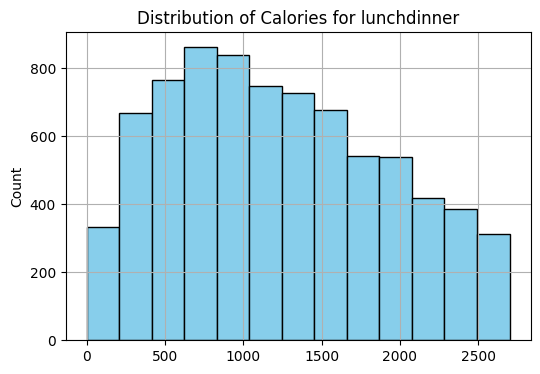

In [50]:
lunchdinner_df = filter_calories(lunchdinner_df)
plot_distribution(lunchdinner_df, bins=13, title='Distribution of Calories for lunchdinner')

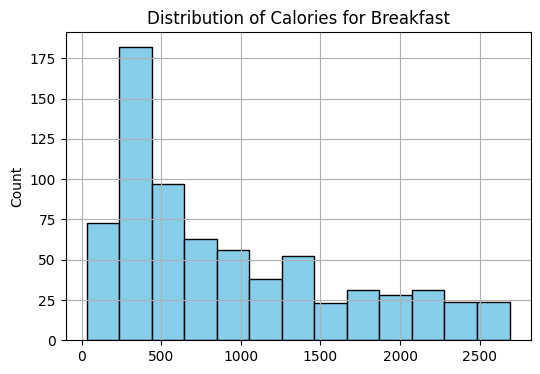

In [51]:
breakfast_df = filter_calories(breakfast_df)
plot_distribution(breakfast_df, bins=13, title='Distribution of Calories for Breakfast')

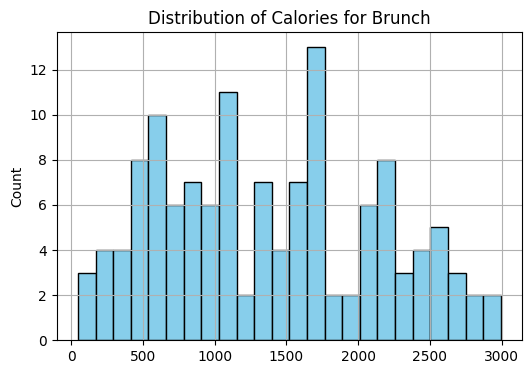

In [52]:
brunch_df = filter_calories(brunch_df)
plot_distribution(brunch_df, bins=24, title='Distribution of Calories for Brunch')

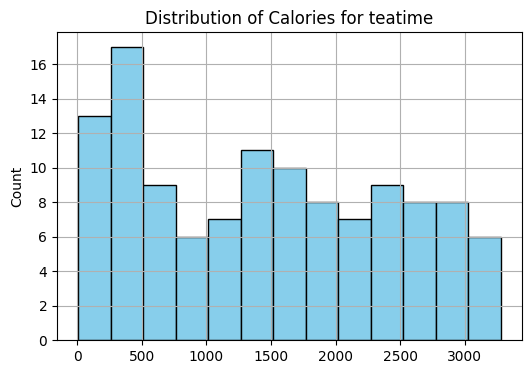

In [53]:
teatime_df = filter_calories(teatime_df)
plot_distribution(teatime_df, bins=13, title='Distribution of Calories for teatime')

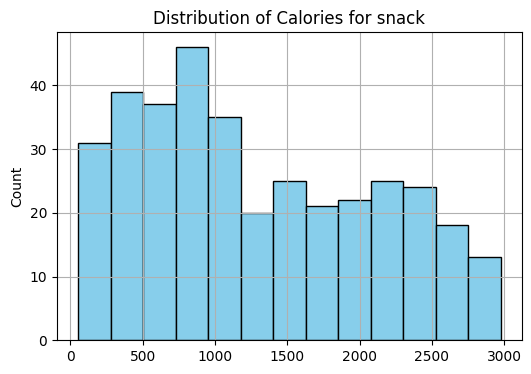

In [54]:
snack_df = filter_calories(snack_df)
plot_distribution(snack_df, bins=13, title='Distribution of Calories for snack')

So lunch/dinner is more so normally distributed. Breakfast is skewed, and the rest are kind of all over the place but with a somewhat cyclical pattern. Let's combine them into an other category now since they are all few in count anyway.

In [55]:
Counter(get_values(df2, 'mealType'))

Counter({'lunch/dinner': 8909,
         'breakfast': 817,
         'snack': 414,
         'brunch': 145,
         'teatime': 139})

In [56]:
#for multilabeled rows we need a priority list to select which one we want to keep so it has just one main label
meal_type_priority_list = ['breakfast', 'lunch/dinner', 'brunch', 'snack', 'teatime']
new_meal_type_df = []
for meal_type_lst in mealType_df:
    if len(meal_type_lst) > 1:
        for meal_type in meal_type_priority_list:
            if meal_type in meal_type_lst:
                new_meal_type_df.append(meal_type)
                break
    else:
        new_meal_type_df.append(meal_type_lst[0])


# Define a function to replace 'brunch', 'teatime' into snack also
def replace_values(value):
    if value in ['brunch', 'teatime']:
        return 'snack'
    else:
        return value

new_meal_type_df = [replace_values(meal_type) for meal_type in new_meal_type_df]

In [57]:
new_meal_type_df = pd.DataFrame(new_meal_type_df)
new_meal_type_df.rename(columns={0: 'mealTypeRefined'}, inplace=True)

In [58]:
Counter(new_meal_type_df['mealTypeRefined'])

Counter({'lunch/dinner': 8895, 'breakfast': 817, 'snack': 673})

In [59]:
new_meal_type_df

,mealTypeRefined
0,lunch/dinner
1,lunch/dinner
2,lunch/dinner
3,lunch/dinner
4,lunch/dinner
...,...
10380,lunch/dinner
10381,lunch/dinner
10382,lunch/dinner
10383,lunch/dinner


In [60]:
df2 = pd.concat([df2, new_meal_type_df], axis = 1)

In [61]:
df2.columns

Index(['index', 'uri', 'label', 'image', 'source', 'url', 'shareAs', 'yield',
       'dietLabels', 'healthLabels', 'cautions', 'ingredientLines',
       'ingredients', 'calories', 'totalWeight', 'totalTime', 'cuisineType',
       'mealType', 'dishType', 'totalNutrients', 'totalDaily', 'digest',
       'tags', 'binnedCalories', 'dishTypeLabel', 'dishTypeSkewedLabels',
       'mealTypeRefined'],
      dtype='object')

Now let's check the new distributions.

In [111]:
lunch_dinner_df = df2[df2['mealTypeRefined'] == 'lunch/dinner']
snack_df = df2[df2['mealTypeRefined'] == 'snack']
breakfast_df = df2[df2['mealTypeRefined'] == 'breakfast']

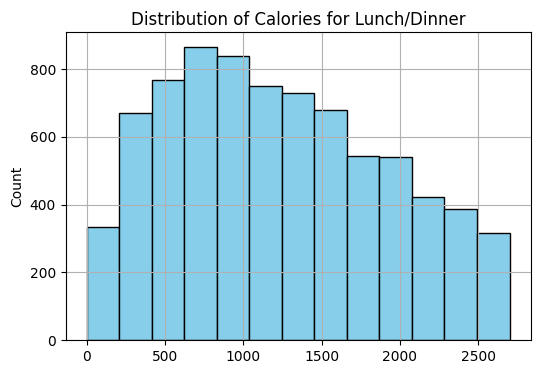

In [117]:
lunch_dinner_df_calories_df = filter_calories(lunch_dinner_df)
plot_distribution(lunch_dinner_df_calories_df, bins=13, title='Distribution of Calories for Lunch/Dinner')

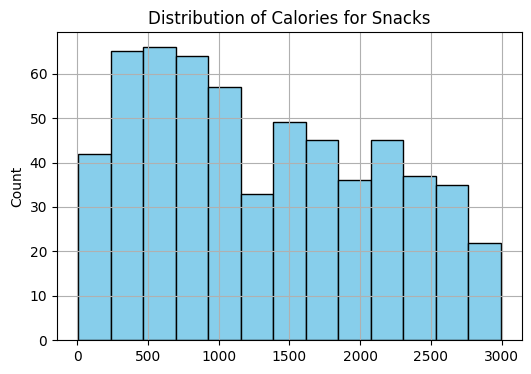

In [116]:
snack_calories_df = filter_calories(snack_df)
plot_distribution(snack_calories_df, bins=13, title='Distribution of Calories for Snacks')

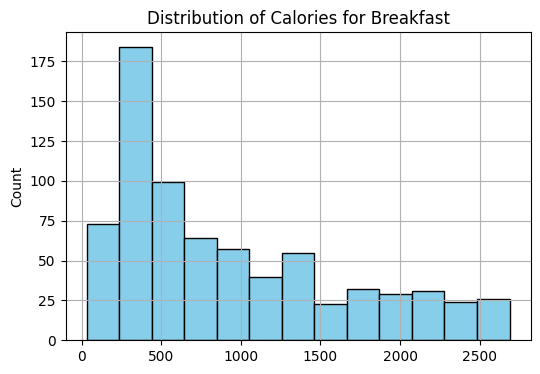

In [115]:
breakfast_calories_df = filter_calories(breakfast_df)
plot_distribution(breakfast_calories_df, bins=13, title='Distribution of Calories for Breakfast')

In [118]:
df2.groupby('mealTypeRefined')['calories'].skew()

mealTypeRefined
breakfast       0.986597
lunch/dinner    0.629500
snack           0.471262
Name: calories, dtype: float64

So breakfast is clearly skewed but the others aren't as bad. This may be better off one hot encoded.

## Preprocessing

### Target Variable

In [300]:
#get only columns that we need
preprocessed_df = df2[['label', 'dishTypeSkewedLabels', 'mealTypeRefined', 'binnedCalories']]

In [301]:
binnedCalories_df = preprocessed_df['binnedCalories']

In [302]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(preprocessed_df['binnedCalories'])

In [303]:
encoded_labels

array([ 0,  7, 12, ...,  2,  7, 11])

In [304]:
for category, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{category} -> {encoded_label}")

0-299 -> 0
1200-1499 -> 1
1500-1799 -> 2
1800-2099 -> 3
2100-2399 -> 4
2400-2699 -> 5
2700-2999 -> 6
300-599 -> 7
3000-3299 -> 8
3300-3599 -> 9
3600-3899 -> 10
600-899 -> 11
900-1199 -> 12


In [305]:
calorie_intervals = list(binnedCalories_df.unique())

sorted_calorie_intervals = sorted((map(lambda x: tuple(map(int, x.split('-'))), calorie_intervals)), key=lambda x: x[0])

# Convert sorted tuples back to interval strings
sorted_calorie_intervals = ['{}-{}'.format(lower, upper) for lower, upper in sorted_calorie_intervals]

sorted_calorie_intervals

['0-299',
 '300-599',
 '600-899',
 '900-1199',
 '1200-1499',
 '1500-1799',
 '1800-2099',
 '2100-2399',
 '2400-2699',
 '2700-2999',
 '3000-3299',
 '3300-3599',
 '3600-3899']

In [306]:
label_encoding_map = {}

for i in range(len(sorted_calorie_intervals)):
    label_encoding_map[sorted_calorie_intervals[i]] = i

label_encoding_map

{'0-299': 0,
 '300-599': 1,
 '600-899': 2,
 '900-1199': 3,
 '1200-1499': 4,
 '1500-1799': 5,
 '1800-2099': 6,
 '2100-2399': 7,
 '2400-2699': 8,
 '2700-2999': 9,
 '3000-3299': 10,
 '3300-3599': 11,
 '3600-3899': 12}

In [307]:
target = binnedCalories_df.map(label_encoding_map)

In [308]:
target = pd.DataFrame(target)
target = target.rename(columns={'binnedCalories': 'calorieLabels'})
target

,calorieLabels
0,0
1,1
2,3
3,0
4,0
...,...
10380,8
10381,1
10382,5
10383,1


In [312]:
preprocessed_df = pd.concat([preprocessed_df, target], axis=1).drop('binnedCalories', axis=1)

In [313]:
preprocessed_df.head()

,label,dishTypeSkewedLabels,mealTypeRefined,calorieLabels
0,Green Beans,Approximately Symmetric (Normal Calories),lunch/dinner,0
1,Sauteed Green Beans,Approximately Symmetric (Normal Calories),lunch/dinner,1
2,Caramelized Green Beans,Approximately Symmetric (Normal Calories),lunch/dinner,3
3,Sautéed Fresh Green Beans,Approximately Symmetric (Normal Calories),lunch/dinner,0
4,Fancy Green Beans,Approximately Symmetric (Normal Calories),lunch/dinner,0


### Input Variables

#### dishTypeSkewedLabels

In [314]:
preprocessed_df['dishTypeSkewedLabels'].unique()

array(['Approximately Symmetric (Normal Calories)',
       'Right Skewed (Lower Calories)', 'Left Skewed (Higher Calories)',
       nan], dtype=object)

In [315]:
#need to get rid of those nan values first
preprocessed_df = preprocessed_df.dropna()
preprocessed_df = preprocessed_df.reset_index(drop=True)

We can just label encode this too since there is some order to it in a sense, with them being skewed. 

In [316]:
dish_type_map = {'Approximately Symmetric (Normal Calories)': 1, 'Right Skewed (Lower Calories)': 0, 'Left Skewed (Higher Calories)': 2}

In [317]:
preprocessed_df['dishTypeSkewedLabels'].map(dish_type_map)

0        1
1        1
2        1
3        1
4        1
        ..
10378    1
10379    1
10380    1
10381    1
10382    1
Name: dishTypeSkewedLabels, Length: 10383, dtype: int64

In [318]:
preprocessed_df.loc[:, 'dishTypeSkewedLabels'] = preprocessed_df['dishTypeSkewedLabels'].map(dish_type_map)

In [319]:
preprocessed_df.head(3)

,label,dishTypeSkewedLabels,mealTypeRefined,calorieLabels
0,Green Beans,1,lunch/dinner,0
1,Sauteed Green Beans,1,lunch/dinner,1
2,Caramelized Green Beans,1,lunch/dinner,3


#### mealTypeRefined

In [320]:
preprocessed_df['mealTypeRefined'].unique()

array(['lunch/dinner', 'snack', 'breakfast'], dtype=object)

There isn't as clear of an order here, though intuitively maybe, but let's just one hot encode it for now.

In [321]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
onehot_encoder = OneHotEncoder()

# Fit and transform the column to one-hot encoded format
onehot_encoded = onehot_encoder.fit_transform(preprocessed_df[['mealTypeRefined']])

onehot_encoded_array = onehot_encoded.toarray()

# Create a DataFrame from the one-hot encoded array
onehot_encoded_df = pd.DataFrame(onehot_encoded_array, columns=onehot_encoder.get_feature_names_out(['mealTypeRefined']))

In [322]:
onehot_encoded_df

,mealTypeRefined_breakfast,mealTypeRefined_lunch/dinner,mealTypeRefined_snack
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
10378,0.0,1.0,0.0
10379,0.0,1.0,0.0
10380,0.0,1.0,0.0
10381,0.0,1.0,0.0


In [323]:
preprocessed_df = pd.concat([onehot_encoded_df, preprocessed_df], axis=1)
preprocessed_df = preprocessed_df.drop('mealTypeRefined', axis=1)

In [324]:
preprocessed_df.head()

,mealTypeRefined_breakfast,mealTypeRefined_lunch/dinner,mealTypeRefined_snack,label,dishTypeSkewedLabels,calorieLabels
0,0.0,1.0,0.0,Green Beans,1,0
1,0.0,1.0,0.0,Sauteed Green Beans,1,1
2,0.0,1.0,0.0,Caramelized Green Beans,1,3
3,0.0,1.0,0.0,Sautéed Fresh Green Beans,1,0
4,0.0,1.0,0.0,Fancy Green Beans,1,0


#### Recipe Names/label

In [325]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [326]:
english_stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

#making a function to remove stop words - taken from the above link
def remove_stop_words(review):
    #get the words in the review as a list
    review_words = review.split()
    
    #make a new list with the same words but only if they are not a stop word
    removed_stop_words_list = [word for word in review_words if word not in english_stop_words]
    
    removed_stop_words = ' '.join(removed_stop_words_list)
    
    return removed_stop_words

def lemmatizing_reviews(review):
    #get review text as a list of words
    review_list = review.split()
    
    #lemmatize the words
    lemmatized_list = [lemmatizer.lemmatize(word) for word in review_list]
    
    #make it into a string again
    lemmatized_review = ' '.join(lemmatized_list)
    
    return lemmatized_review

In [327]:
recipes = preprocessed_df['label']
recipes = recipes.apply(remove_stop_words)
recipes = recipes.apply(lemmatizing_reviews)
recipes = recipes.apply(lambda x: word_tokenize(x))

In [328]:
preprocessed_df.loc[:, 'label'] = recipes

In [329]:
preprocessed_df.head()

,mealTypeRefined_breakfast,mealTypeRefined_lunch/dinner,mealTypeRefined_snack,label,dishTypeSkewedLabels,calorieLabels
0,0.0,1.0,0.0,"[Green, Beans]",1,0
1,0.0,1.0,0.0,"[Sauteed, Green, Beans]",1,1
2,0.0,1.0,0.0,"[Caramelized, Green, Beans]",1,3
3,0.0,1.0,0.0,"[Sautéed, Fresh, Green, Beans]",1,0
4,0.0,1.0,0.0,"[Fancy, Green, Beans]",1,0


## Modeling

First let's do the standard initial step of getting our data ready and splitting it into training and testing sets.

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import cohen_kappa_score, make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

seed = 42

In [346]:
preprocessed_df.dtypes

mealTypeRefined_breakfast        float64
mealTypeRefined_lunch/dinner     float64
mealTypeRefined_snack            float64
label                             object
dishTypeSkewedLabels              object
calorieLabels                   category
dtype: object

We need to fix the columns that aren't floats or ints.

In [350]:
preprocessed_df['dishTypeSkewedLabels'] = preprocessed_df['dishTypeSkewedLabels'].astype(int)
preprocessed_df['calorieLabels'] = preprocessed_df['calorieLabels'].astype(int)

In [351]:
preprocessed_df.dtypes

mealTypeRefined_breakfast       float64
mealTypeRefined_lunch/dinner    float64
mealTypeRefined_snack           float64
label                            object
dishTypeSkewedLabels              int32
calorieLabels                     int32
dtype: object

Now we need to process the label or recipe names using bag of words or tfidf, but we want to fit them only on training data first. 

In [352]:
X = preprocessed_df[['mealTypeRefined_breakfast', 'mealTypeRefined_lunch/dinner', 'mealTypeRefined_snack', 'label', 'dishTypeSkewedLabels']]
y = preprocessed_df['calorieLabels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

tfidf = TfidfVectorizer()

tfidf_X_train_labels = tfidf.fit_transform(X_train['label'].str.join(' '))
tfidf_X_test_labels = tfidf.transform(X_test['label'].str.join(' '))

In [353]:
tfidf_train_df = pd.DataFrame(tfidf_X_train_labels.toarray(), columns=tfidf.get_feature_names_out())
tfidf_test_df = pd.DataFrame(tfidf_X_test_labels.toarray(), columns=tfidf.get_feature_names_out())

In [354]:
X_train_tfidf = pd.concat([tfidf_train_df, X_train.drop('label', axis=1)], axis=1)
X_test_tfidf = pd.concat([tfidf_test_df, X_test.drop('label', axis=1)], axis=1)

### XGBoost

#### Classification

In [364]:
kappa_scorer = make_scorer(cohen_kappa_score)

In [369]:
parameters = {
    'learning_rate': [0.1, 0.01, 0.001], 
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 150]
}

xgb_clf = XGBClassifier(objective='multi:softmax', 
                             num_class=13, 
                             random_state=seed, 
                             device = "cuda")

clf = GridSearchCV(xgb_clf, parameters, scoring=kappa_scorer, n_jobs=-1)

clf.fit(X_train_tfidf, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=13,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring=make_scorer(cohen_kappa_score, response_method='predict'))

In [371]:
print('Accuracy training set score for xgboost after GridSearch:', accuracy_score(clf.predict(X_train_tfidf), y_train))

y_pred = clf.predict(X_test_tfidf)

print('Accuracy testing set score for xgboost after GridSearch:', accuracy_score(y_pred, y_test))

Accuracy training set score for xgboost after GridSearch: 0.4300505658560077
Accuracy testing set score for xgboost after GridSearch: 0.18921521425132404


In [372]:
print('Kappa training set score for xgboost after GridSearch:', clf.score(X_train_tfidf, y_train))

print('Kappa testing set score for xgboost after GridSearch:', clf.score(y_pred, y_test))

Kappa training set score for xgboost after GridSearch: 0.35591000091124547
Kappa testing set score for xgboost after GridSearch: 0.0


#### Regression

In [373]:
from xgboost import XGBRegressor
import numpy as np

In [374]:
xgb_regressor = XGBRegressor(objective='multi:softmax', 
                             num_class=13, 
                             random_state=seed, 
                             device = "cuda")

xgb_regressor.fit(X_train_tfidf, y_train)

y_pred = xgb_regressor.predict(X_test_tfidf)

In [376]:
accuracy_score(y_pred, y_test)

0.18006740491092924